Para o exercício de hoje, utilizaremos uma nova ferramenta.

Acesse: https://www.mycompiler.io/pt

Clique na Opção 'SQL'

Após isso você terá um ambiente para programar em SQL. O Proprio site já virá com um código de exemplo.

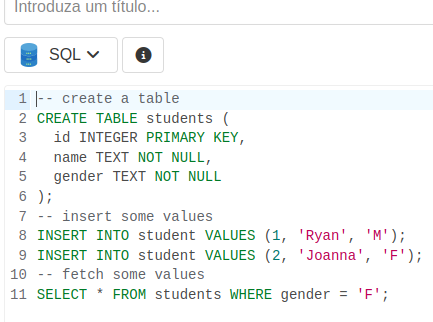

Para execução dos códigos basta clicar em Execução no canto esquerda da tela:

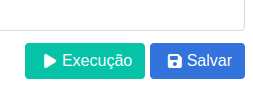

Logo abaixo desse botão execução terá a saída de resultados dos códigos executador. Bom Proveito.

Considerando o seguinte banco de dados faça o que se pede a seguir:

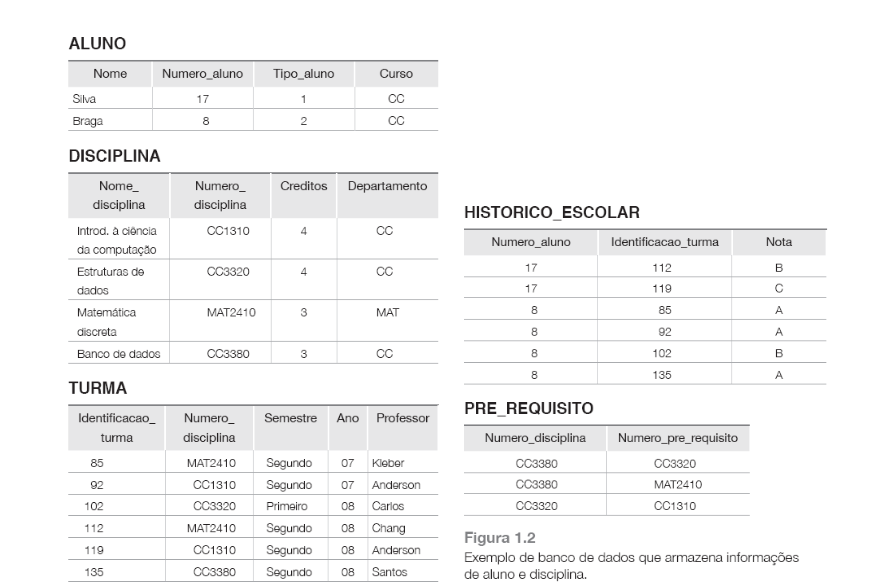

**QUESTAO 1** <br>
Considere o banco de dados mostrado na Figura.
Escreva instruções DDL da SQL apropriadas para definir o banco de dados. Ou seja, defina as tabelas utilizando SQL. Lembre das chaves primárias e estrangeiras.

* Faça o código utilizando a aplicação recomendada no incio do notebook.


In [ ]:
CREATE TABLE Aluno (
    Nome VARCHAR(30) NOT NULL,
    NumeroAluno INTEGER NOT NULL,
    TipoAluno INT NOT NULL,
    Curso CHAR(4),
    PRIMARY KEY (NumeroAluno)
);

CREATE TABLE Disciplina (
    NomeDisciplina VARCHAR(30) NOT NULL,
    NumeroDisciplina CHAR(8) NOT NULL,
    Creditos INT,
    Departamento CHAR(4),
    PRIMARY KEY (NumeroDisciplina),
    UNIQUE (NomeDisciplina)
);

CREATE TABLE Turma(
    IdentificacaoTurma INT NOT NULL,
    NumeroDisciplina CHAR(8) NOT NULL,
    Semestre VARCHAR(6) NOT NULL,
    Ano CHAR(4) NOT NULL,
    Professor VARCHAR(10),
    PRIMARY KEY (IdentificacaoTurma),
    FOREIGN KEY (NumeroDisciplina)
    REFERENCES
    Disciplina (NumeroDisciplina)
);

CREATE TABLE HistoricoEscolar (
    NumeroAluno INT NOT NULL,
    IdentificacaoTurma INT NOT NULL,
    Nota CHAR, 
    PRIMARY KEY (NumeroAluno, IdentificacaoTurma),
    FOREIGN KEY (NumeroAluno)
    REFERENCES
    Aluno (NumeroAluno),
    FOREIGN KEY (IdentificacaoTurma)
    REFERENCES 
    Turma (IdentificacaoTurma)
);

CREATE TABLE PreRequisitos (
    NumeroDisciplina CHAR(8) NOT NULL,
    NumeroPreRequisito CHAR(8) NOT NULL,
    PRIMARY KEY (NumeroDisciplina, NumeroPreRequisito),
    FOREIGN KEY (NumeroDisciplina) REFERENCES Disciplina (NumeroDisciplina)  
);
INSERT INTO Aluno VALUES ('Silva', 17, 1, 'CC');
INSERT INTO Aluno VALUES ('Braga', 8, 2, 'CC');

INSERT INTO Disciplina VALUES ('Introd. á ciência da computação', 'CC1310', 4, 'CC');
INSERT INTO Disciplina VALUES ('Estrutura de dados', 'CC3320', 4, 'CC');
INSERT INTO Disciplina VALUES ('Matemática discreta', 'MAT2410', 3, 'MAT');
INSERT INTO Disciplina VALUES ('Banco de dados', 'CC3380', 3, 'CC');

INSERT INTO Turma VALUES (85, 'MAT2410', 'Segundo', '07', 'Kleber');
INSERT INTO Turma VALUES (92, 'CC1310', 'Segundo', '07', 'Anderson');
INSERT INTO Turma VALUES (102, 'CC3320', 'Primeiro', '08', 'Carlos');
INSERT INTO Turma VALUES (112, 'MAT2410', 'Segundo', '08', 'Chang');
INSERT INTO Turma VALUES (119, 'CC1310', 'Segundo', '08', 'Anderson');
INSERT INTO Turma VALUES (135, 'CC3380', 'Segundo', '08', 'Santos');

INSERT INTO HistoricoEscolar VALUES (17, 112, 'B');
INSERT INTO HistoricoEscolar VALUES (17, 119, 'C');
INSERT INTO HistoricoEscolar VALUES (8, 85, 'A');
INSERT INTO HistoricoEscolar VALUES (8, 92, 'A');
INSERT INTO HistoricoEscolar VALUES (8, 102, 'B');
INSERT INTO HistoricoEscolar VALUES (8, 135, 'A');

INSERT INTO PreRequisitos VALUES ('CC3380', 'CC3320');
INSERT INTO PreRequisitos VALUES ('CC3380', 'MAT2410');
INSERT INTO PreRequisitos VALUES ('CC3320', 'CC1310');

**QUESTÃO 2**
Especifique as consultas a seguir em SQL no esquema de banco de dados da Figura acima.
1. Recupere os nomes de todos os alunos sênior(Tipo_aluno=2) que estão se formando em 'CC' (Ciência da
Computação).
2. Recupere os nomes de todas as disciplinas lecionadas pelo Professor Kleber em 2007 e 2008.
3. Para cada matéria lecionada pelo Professor Kleber, recupere o número da disciplina,
semestre, ano e número de alunos que frequentaram a turma.
4. Recupere o nome e o histórico de cada aluno sênior (Tipo_aluno = 2) que está se
formando em CC. Um histórico inclui nome da disciplina, número da disciplina, crédito em
horas, semestre, ano e nota para cada disciplina concluída pelo aluno.

In [ ]:
#1 
SELECT Nome FROM Aluno WHERE TipoAluno == 2;

#2
SELECT Disciplina.NomeDisciplina FROM Disciplina
JOIN Turma on Disciplina.NumeroDisciplina = Turma.NumeroDisciplina
WHERE Turma.Professor == 'Kleber' AND (Turma.Ano == '07' OR Turma.Ano == '08');

#3
SELECT
    Turma.NumeroDisciplina,
    Turma.Semestre,
    Turma.Ano,
COUNT(HistoricoEscolar.NumeroAluno) AS NumeroAlunos
FROM Turma
JOIN HistoricoEscolar ON Turma.IdentificacaoTurma = HistoricoEscolar.IdentificacaoTurma
WHERE Turma.Professor == 'Kleber'
GROUP BY Turma.NumeroDisciplina, Turma.Semestre, Turma.Ano;

#4
SELECT 
    Aluno.Nome AS NomeAluno,
    Disciplina.NomeDisciplina,
    Disciplina.NumeroDisciplina,
    Disciplina.Creditos,
    Turma.Semestre,
    Turma.Ano,
    HistoricoEscolar.Nota
FROM Aluno
JOIN HistoricoEscolar ON Aluno.NumeroAluno = HistoricoEscolar.NumeroAluno
JOIN Turma ON HistoricoEscolar.IdentificacaoTurma = Turma.IdentificacaoTurma
JOIN Disciplina ON Turma.NumeroDisciplina = Disciplina.NumeroDisciplina
WHERE Aluno.TipoAluno = '2' AND Aluno.Curso = 'CC'


**QUESTÃO 3** <br>
Escreva instruções de atualização SQL para realizar ações sobre o esquema de banco de dados mostrado na Figura acima.
1. Inserir um novo aluno, <'Alves', 25, 1, 'MAT'>, no banco de dados.
2. Alterar o tipo do aluno 'Silva' para 2 (segundo ano).
3. Inserir uma nova disciplina, <'Engenharia do conhecimento', 'CC4390', 3, 'CC'>.
4. Excluir o registro para o aluno cujo nome é 'Silva' e cujo número de aluno é 17.

In [ ]:
#1
INSERT INTO Aluno VALUES ('Alves', 25, '1', 'MAT');

#2
UPDATE Aluno
SET TipoAluno = '2'
WHERE Nome = 'Silva';

#3
INSERT INTO Disciplina VALUES ('Engenharia do conhecimento', 'CC4390', 3, 'CC');

#4
DELETE FROM Aluno
WHERE Nome = 'Silva' AND NumeroAluno = '17';

**QUESTÃO 4**

Especifique as seguintes consultas em SQL sobre o esquema de banco de dados relacional EMPRESA mostrado ABAIXO.
1. Recupere os nomes de todos os funcionários no departamento 5 que trabalham mais de
10 horas por semana no projeto ProdutoX.
2. Liste os nomes de todos os funcionários que possuem um dependente com o mesmo
primeiro nome que seu próprio.
3. Ache os nomes de todos os funcionários que são supervisionados diretamente por
‘Fernando Wong'.

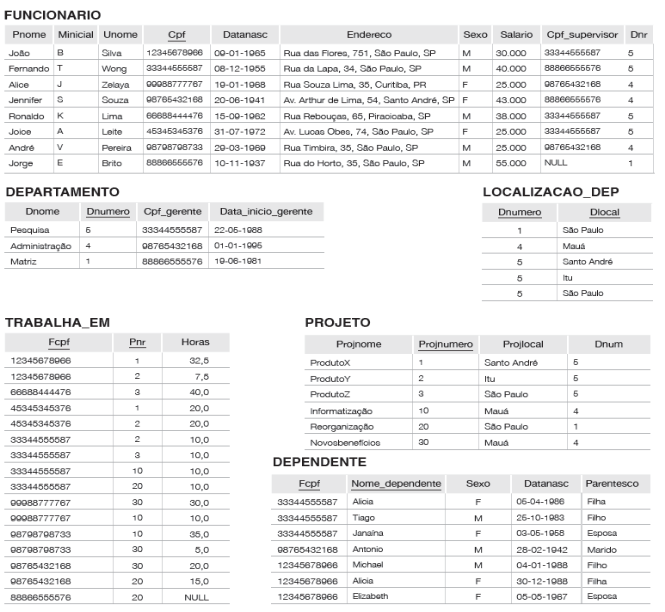